# PROC BGLIMM: The Smooth Transition to Bayesian Analysis

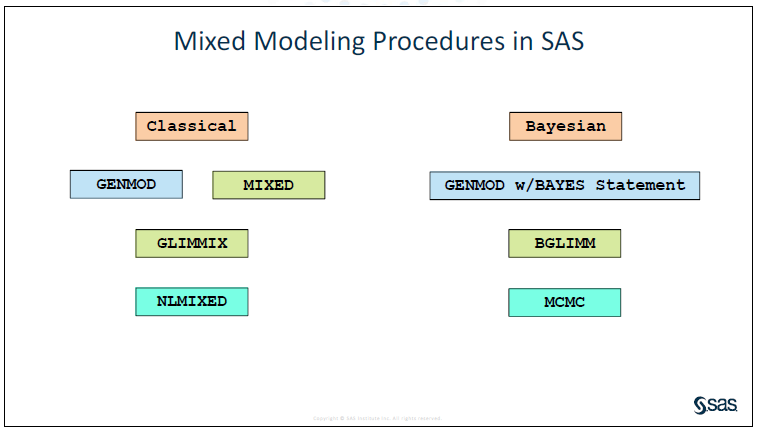

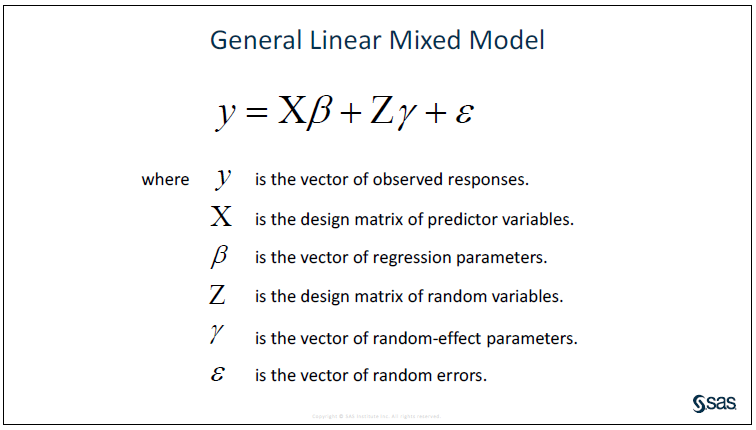

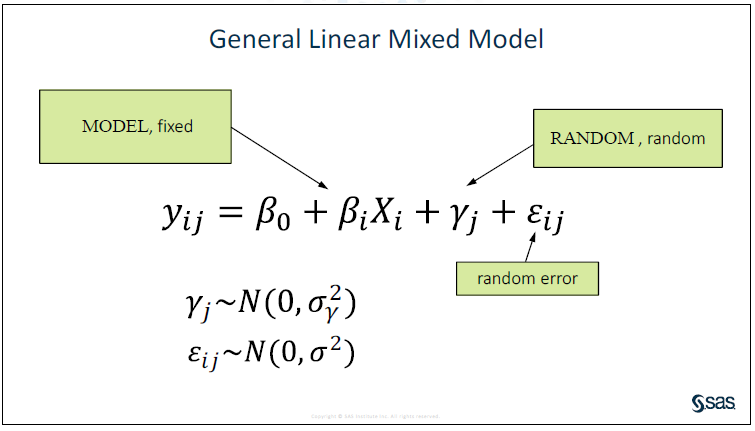

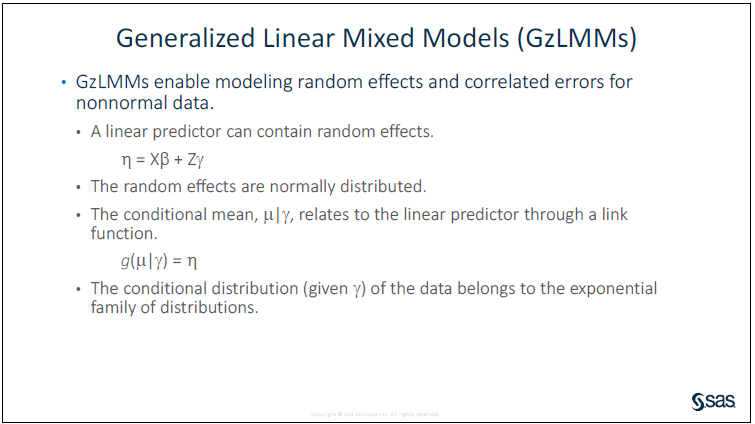

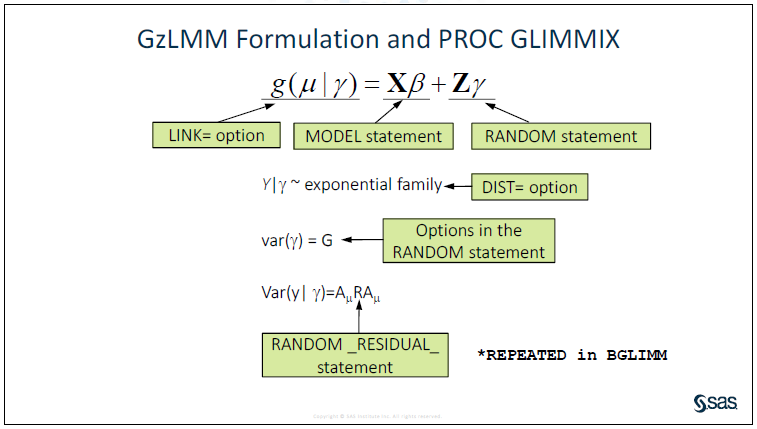

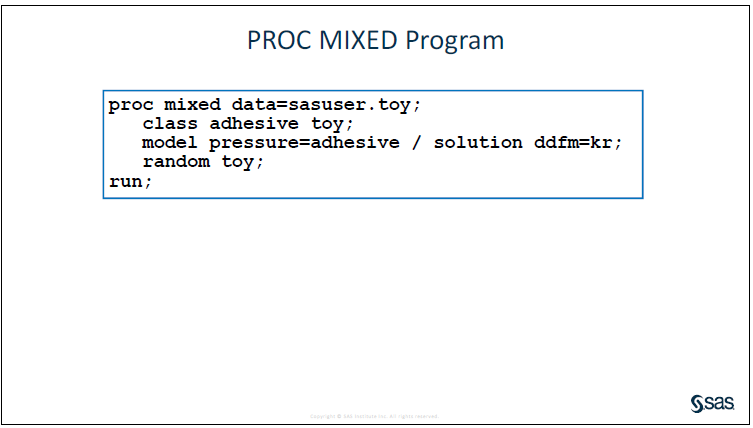

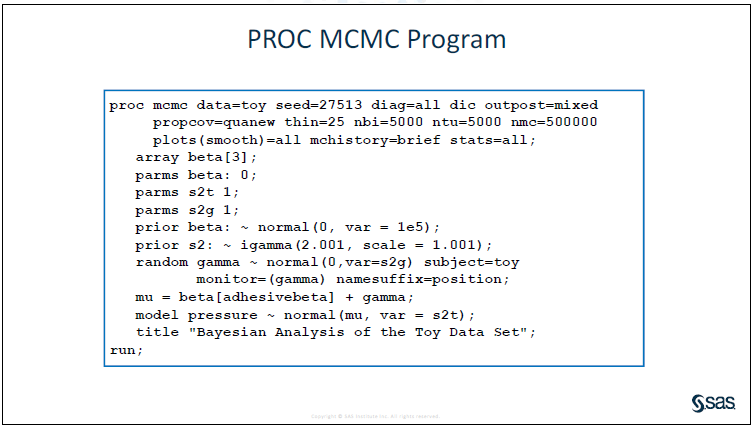

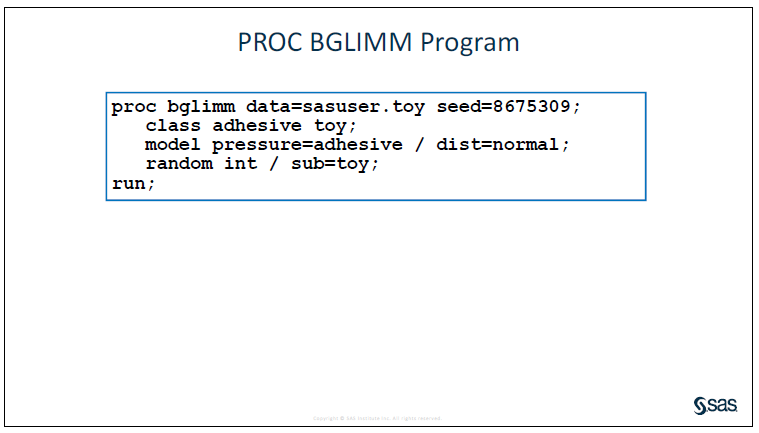

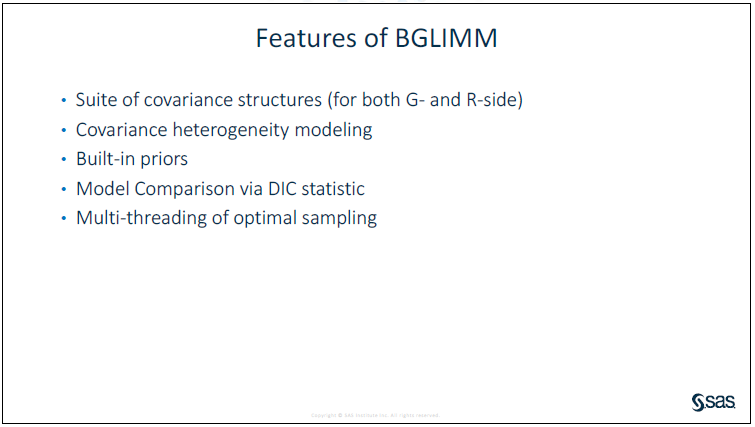

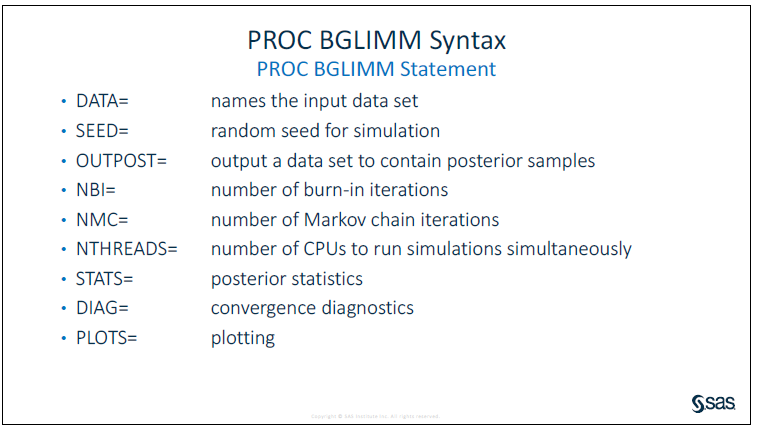

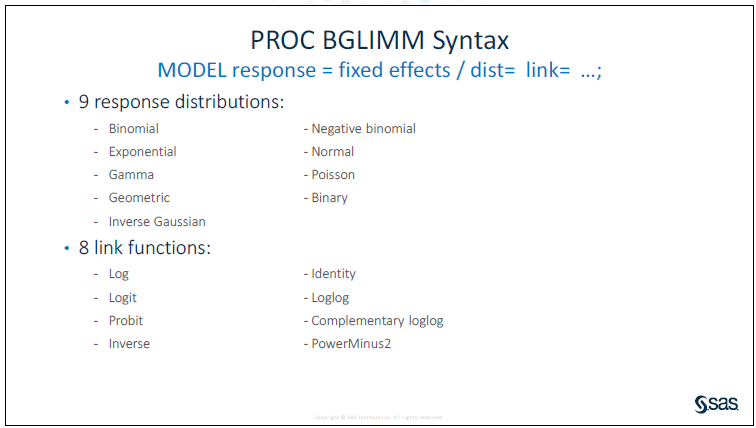

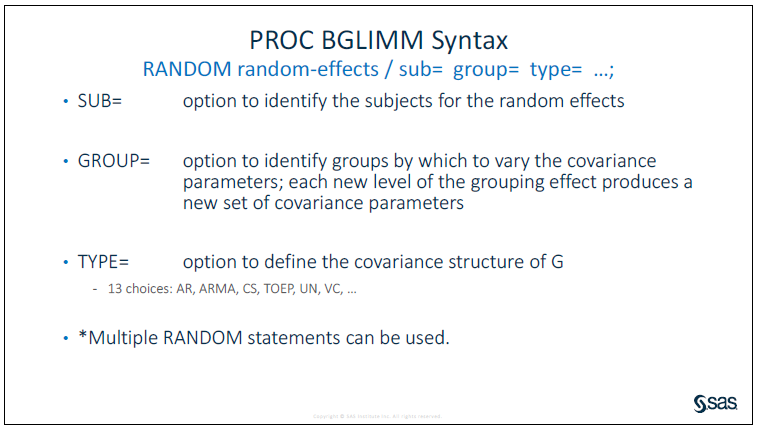

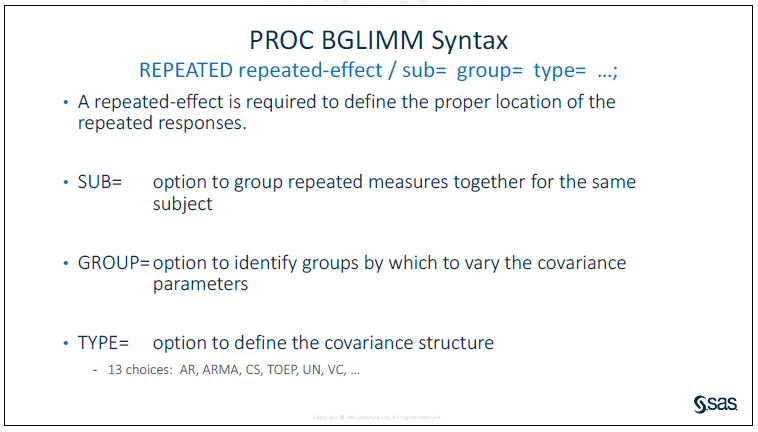

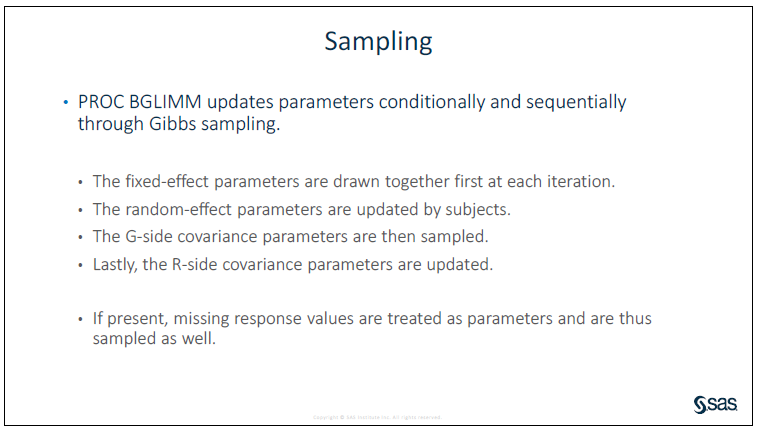

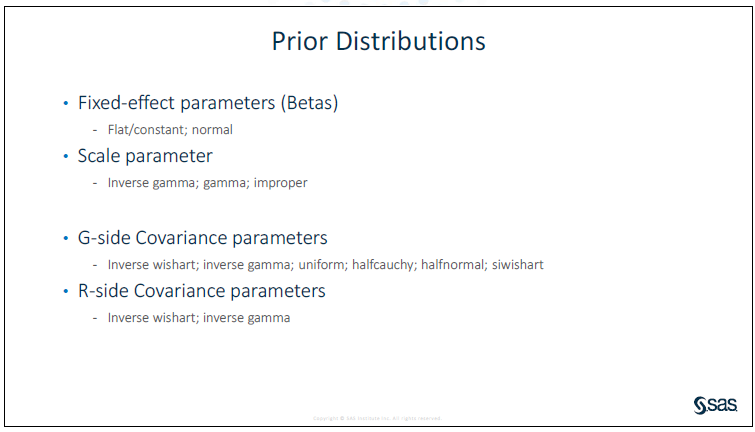

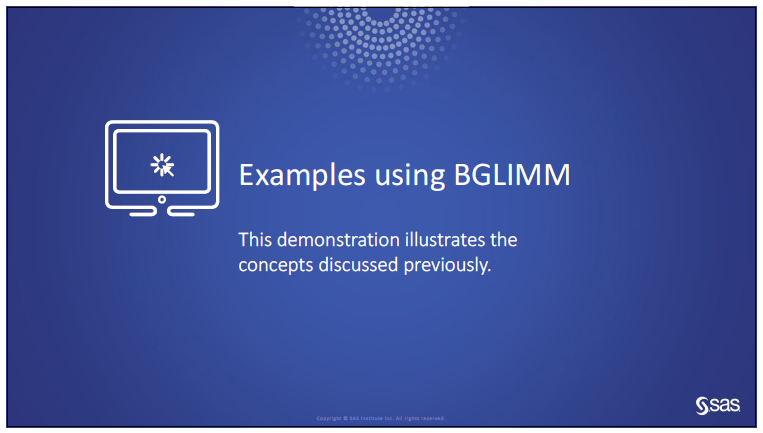

## Example Code using PROC BGLIMM

## Simple Linear Regression with Class Variable

In [1]:
proc bglimm data=sashelp.class seed=8675309;
   class sex;
   model Weight = Height Age Sex / dist=normal coeffprior=normal(variance=1e6);
run;

SAS server started using Context SAS Studio compute context with SESSION_ID=50352737-d82b-4379-bbbd-1199407e31e6-ses0000


### Normal Response with Random Effects (MIXED)

In [2]:
data work.toy;     
   length toy $1;
   input toy $ adhesive $ pressure @@;
datalines;
1 c 67.0 1 b 71.9 1 a 72.2
2 c 67.5 2 b 68.8 2 a 66.4
3 c 76.0 3 b 82.6 3 a 74.5
4 c 72.7 4 b 78.1 4 a 67.3
5 c 73.1 5 b 74.2 5 a 73.2
6 c 65.8 6 b 70.8 6 a 68.7
7 c 75.6 7 b 84.9 7 a 69.0
;
run;

20   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
20 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml1.htm
21   
22   data work.toy;
23      length toy $1;
24      input toy $ adhesive $ pressure @@;
25   datalines;

NOTE: SAS went to a new line when INPUT statement reached past the end of a line.
NOTE: The data set WORK.TOY has 21 observations and 3 variables.
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

33   ;
34   run;
35   ods html5 (id=saspy_internal) close;ods listing;
36   




In [3]:
proc mixed data=work.toy;
   class adhesive toy;
   model pressure = adhesive / solution ddfm=kr2;
   random toy;
run;

### Normal Response with Random Effects (BGLIMM)

In [4]:
proc bglimm data=work.toy seed=8675309;
   class adhesive toy;
   model pressure = adhesive / dist=normal coeffprior=normal(variance=1e6);
   random int / subject=toy;
run;

#### Comparison of Frequentist Estimates and Posterior Means:

|Parameter |       MIXED Value |        BGLIMM Value |
|-----     |  -----            |       ------        |
|Intercept |         71.1000   |           71.0953| 
|Adhesive a|         -0.9143   |           -0.8956| 
|Adhesive b|         4.8000    |           4.7668 |
|Adhesive c|         0         |           0 |
|VC Toy    |         11.4478   |           4.9750 |
|VC Residual|        10.3716   |           12.2922 |

### Poisson Regression with Random Effects (GLIMMIX)

In [5]:
data work.crab;
   input color spine width satellites weight site;
   color=color-1;
   weight=weight/1000;
datalines;
3  3  28.3  8  3050 1
4  3  22.5  0  1550 1
2  1  26.0  9  2300 1
4  3  24.8  0  2100 1
4  3  26.0  4  2600 1
3  3  23.8  0  2100 1
2  1  26.5  0  2350 1
4  2  24.7  0  1900 1
3  1  23.7  0  1950 1
4  3  25.6  0  2150 1
4  3  24.3  0  2150 1
3  3  25.8  0  2650 1
3  3  28.2  11 3050 2
5  2  21.0  0  1850 2
3  1  26.0  14 2300 2
2  1  27.1  8  2950 2
3  3  25.2  1  2000 2
3  3  29.0  1  3000 2
5  3  24.7  0  2200 2
3  3  27.4  5  2700 2
3  2  23.2  4  1950 3
2  2  25.0  3  2300 3
3  1  22.5  1  1600 3
4  3  26.7  2  2600 3
5  3  25.8  3  2000 3
5  3  26.2  0  1300 3
3  3  28.7  3  3150 3
3  1  26.8  5  2700 3
5  3  27.5  0  2600 3
3  3  24.9  0  2100 3
2  1  29.3  4  3200 3
2  3  25.8  0  2600 4
3  2  25.7  0  2000 4
3  1  25.7  8  2000 4
3  1  26.7  5  2700 4
5  3  23.7  0  1850 4
3  3  26.8  0  2650 4
3  3  27.5  6  3150 4
5  3  23.4  0  1900 4
3  3  27.9  6  2800 4
4  3  27.5  3  3100 4
2  1  26.1  5  2800 4
2  1  27.7  6  2500 4
3  1  30.0  5  3300 5
4  1  28.5  9  3250 5
4  3  28.9  4  2800 5
3  3  28.2  6  2600 5
3  3  25.0  4  2100 5
3  3  28.5  3  3000 5
3  1  30.3  3  3600 5
5  3  24.7  5  2100 5
3  3  27.7  5  2900 6
2  1  27.4  6  2700 6
3  3  22.9  4  1600 6
3  1  25.7  5  2000 6
3  3  28.3  15 3000 6
3  3  27.2  3  2700 6
4  3  26.2  3  2300 6
3  1  27.8  0  2750 6
5  3  25.5  0  2250 6
4  3  27.1  0  2550 6
4  3  24.5  5  2050 6
4  1  27.0  3  2450 6
3  3  26.0  5  2150 6
3  3  28.0  1  2800 7
3  3  30.0  8  3050 7
3  3  29.0  10 3200 7
3  3  26.2  0  2400 7
3  1  26.5  0  1300 7
3  3  26.2  3  2400 7
4  3  25.6  7  2800 7
4  3  23.0  1  1650 7
4  3  23.0  0  1800 7
3  3  25.4  6  2250 7
4  3  24.2  0  1900 7
3  2  22.9  0  1600 7
4  2  26.0  3  2200 7
3  3  25.4  4  2250 7
4  3  25.7  0  1200 8
3  3  25.1  5  2100 8
4  2  24.5  0  2250 8
5  3  27.5  0  2900 8
4  3  23.1  0  1650 8
4  1  25.9  4  2550 8
3  3  25.8  0  2300 8
5  3  27.0  3  2250 8
3  3  28.5  0  3050 8
5  1  25.5  0  2750 8
5  3  23.5  0  1900 8
3  2  24.0  0  1700 8
3  1  29.7  5  3850 8
3  1  26.8  0  2550 8
5  3  26.7  0  2450 9
3  1  28.7  0  3200 9
4  3  23.1  0  1550 9
3  1  29.0  1  2800 9
4  3  25.5  0  2250 9
4  3  26.5  1  1967 9
4  3  24.5  1  2200 9
4  3  28.5  1  3000 9
3  3  28.2  1  2867 9
3  3  24.5  1  1600 9
3  3  27.5  1  2550 9
3  2  24.7  4  2550 9
3  1  25.2  1  2000 9
4  3  27.3  1  2900 10
3  3  26.3  1  2400 10
3  3  29.0  1  3100 10
3  3  25.3  2  1900 10
3  3  26.5  4  2300 10
3  3  27.8  3  3250 10
3  3  27.0  6  2500 10
4  3  25.7  0  2100 10 
3  3  25.0  2  2100 10
3  3  31.9  2  3325 10
5  3  23.7  0  1800 10 
5  3  29.3  12 3225 10
4  3  22.0  0  1400 10
3  3  25.0  5  2400 10
4  3  27.0  6  2500 10
4  3  23.8  6  1800 10
2  1  30.2  2  3275 10
4  3  26.2  0  2225 11
3  3  24.2  2  1650 11
3  3  27.4  3  2900 11
3  2  25.4  0  2300 11
4  3  28.4  3  3200 11
5  3  22.5  4  1475 11
3  3  26.2  2  2025 11
3  1  24.9  6  2300 11
2  2  24.5  6  1950 11
3  3  25.1  0  1800 11
3  1  28.0  4  2900 11
5  3  25.8  10 2250 11
3  3  27.9  7  3050 11
3  3  24.9  0  2200 11
3  1  28.4  5  3100 11
4  3  27.2  5  2400 11
3  2  25.0  6  2250 11
3  3  27.5  6  2625 11
3  1  33.5  7  5200 12
3  3  30.5  3  3325 12
4  3  29.0  3  2925 12 
3  1  24.3  0  2000 12
3  3  25.8  0  2400 12
5  3  25.0  8  2100 12
3  1  31.7  4  3725 12
3  3  29.5  4  3025 12
4  3  24.0  10 1900 12
3  3  30.0  9  3000 12
3  3  27.6  4  2850 12
3  3  26.2  0  2300 12
3  1  23.1  0  2000 12
3  1  22.9  0  1600 12
5  3  24.5  0  1900 12
3  3  24.7  4  1950 12
3  3  28.3  0  3200 12
3  3  23.9  2  1850 12
4  3  23.8  0  1800 12
4  2  29.8  4  3500 12
3  3  26.5  4  2350 13 
3  3  26.0  3  2275 13
3  3  28.2  8  3050 13
5  3  25.7  0  2150 13
3  3  26.5  7  2750 13 
3  3  25.8  0  2200 13
4  3  24.1  0  1800 13
4  3  26.2  2  2175 13
4  3  26.1  3  2750 13
4  3  29.0  4  3275 13
2  1  28.0  0  2625 13
5  3  27.0  0  2625 13
3  2  24.5  0  2000 13
;
run;



55   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
55 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml4.htm
56   
57   data work.crab;
58      input color spine width satellites weight site;
59      color=color-1;
60      weight=weight/1000;
61   datalines;

NOTE: The data set WORK.CRAB has 173 observations and 6 variables.
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.01 seconds
      

235  ;
236  run;
237  
238  
239  ods html5 (id=saspy_internal) close;ods listing;
240  




In [6]:
proc glimmix data=work.crab;
   class color spine site;
   model satellites = color spine weight width / dist=poi link=log solution;
   random int / subject=site;
run;


### Poisson Regression with Random Effects (BGLIMM)


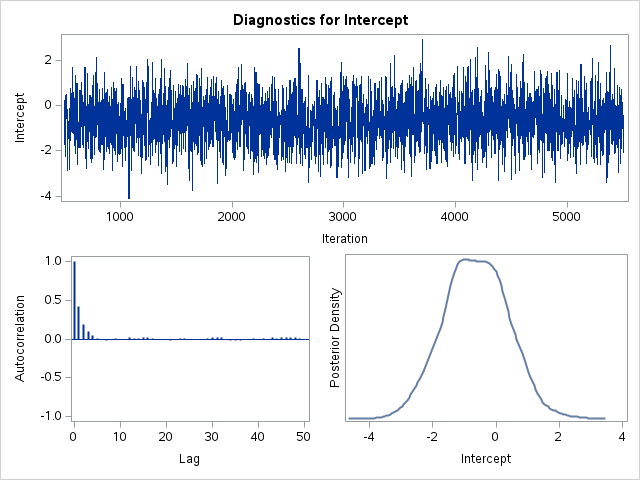
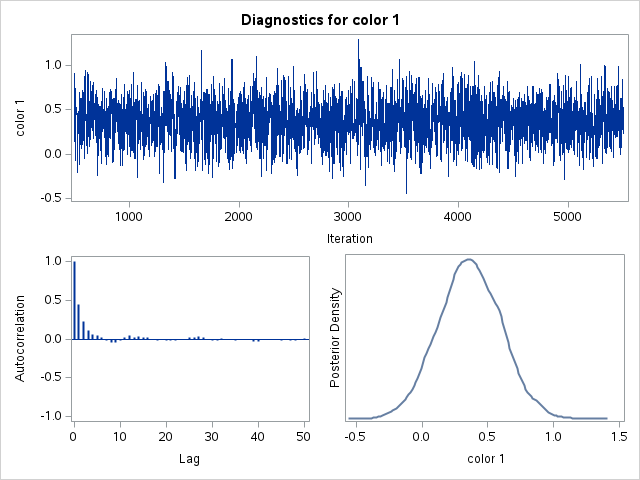
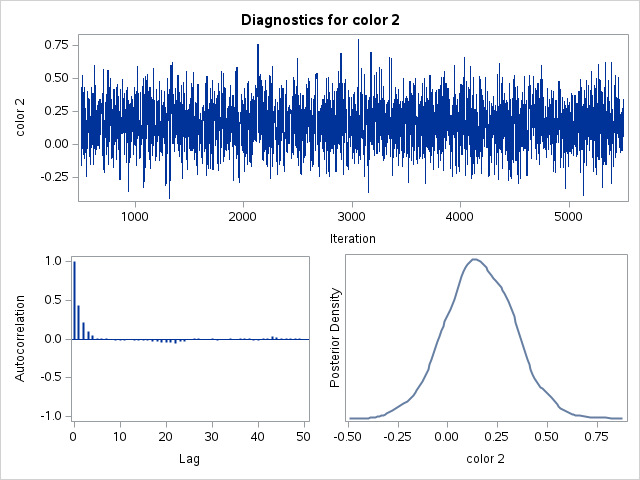
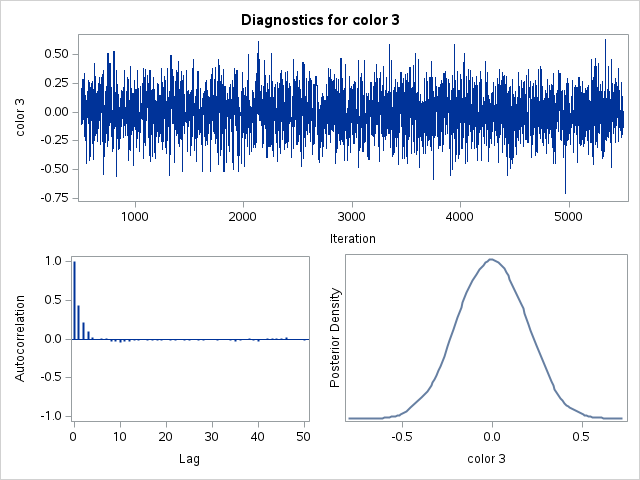
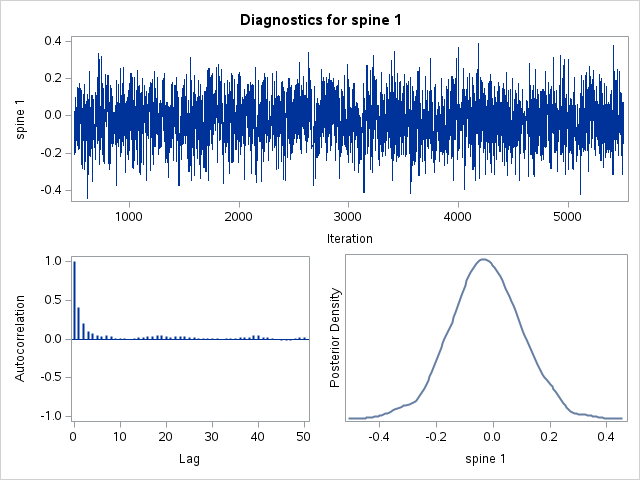
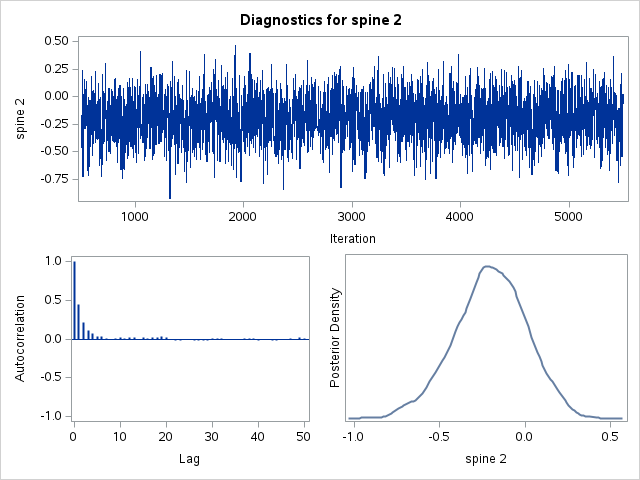
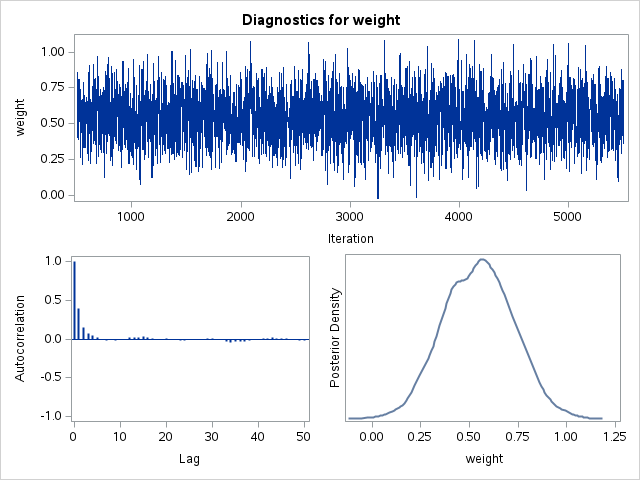
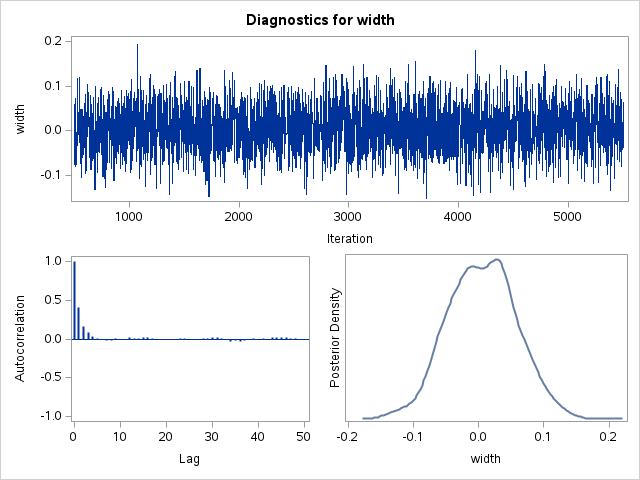
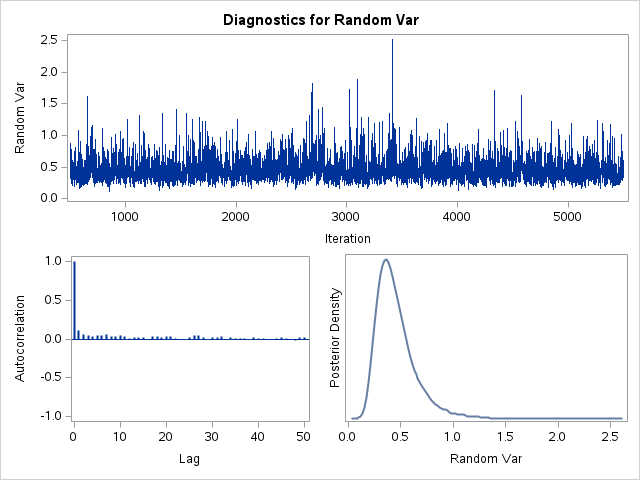

In [7]:
proc bglimm data=work.crab seed=8675309 diag=all plots=all;
   class color spine site;
   model satellites = color spine weight width / dist=poisson link=log;
   random int / subject=site;
run;

#### Comparison of Frequentist Estimates and Posterior Means:

|Parameter|               GLIMMIX|               BGLIMM|
|-----|-----|-----|
|Intercept|              -0.6317|               -0.6361|
|Color1|                  0.3829|                0.3608|
|Color2|                  0.1641|                0.1612|
|Color3|                  -0.00907|              -0.00556|
|Color4|                  0       |              0|
|Spine1|                  -0.03307|              -0.0265|
|Spine2|                  -0.1886 |              -0.2025|
|Spine3|                  0       |              0|
|Weight|                  0.5395  |              0.5456|
|Width |                  0.006855|              0.00533|
|VC Site|                 0.1494  |              0.4560|

### Continuous Response (Normal) with Repeated Measures (MIXED)

In [8]:
data work.heartrate;
   input patient drug$ baseline hr1 hr5 hr15 hr30 hr1h;
   array hra{5} hr1 hr5 hr15 hr30 hr1h;
   do i = 1 to 5;
      if (i = 1) then hours = 1/60;
      else if (i = 2) then hours = 5/60;
      else if (i = 3) then hours = 15/60;
      else if (i = 4) then hours = 30/60;
      else hours = 1;
      heartrate = hra{i};
      output;
   end;
   drop i hr1 hr5 hr15 hr30 hr1h;
   datalines;
201  p    92   76   84   88   96   84
202  b    54   58   60   60   60   64
203  p    84   86   82   84   86   82
204  a    72   72   68   68   78   72
205  b    80   84   84   96   92   72
206  p    68   72   68   68   64   62
207  a   100  104  100   92   92   68
208  a    60   60   58   56   50   56
209  a    88  104   88   88   78   84
210  b    92   82   82   76   82   80
211  b    88   80   84   80   80   78
212  p   102   86   86   96   86   88
214  a    84   92  100   88   88   80
215  b   104  100   96   88   92   84
216  a    92   80   72   64   68   64
217  p    92   88   84   76   88   84
218  a    72   84   78   80   80   76
219  b    72  100   92   84   88   80
220  p    80   80   80   78   80   78
221  p    72   68   76   72   72   68
222  b    88   88   98   98   96   88
223  b    88   88   96   88   88   80
224  p    88   78   84   64   68   64
232  a    78   72   72   78   80   68
;
run;



260  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
260! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml7.htm
261  
262  data work.heartrate;
263     input patient drug$ baseline hr1 hr5 hr15 hr30 hr1h;
264     array hra{5} hr1 hr5 hr15 hr30 hr1h;
265     do i = 1 to 5;
266        if (i = 1) then hours = 1/60;
267        else if (i = 2) then hours = 5/60;
268        else if (i = 3) then hours = 15/60;
269        else if (i = 4) then hours = 30/60;
270        else hours = 1;
271        heartrate = hra{i};
272        output;
273     end;
274     drop i hr1 hr5 hr15 hr30 hr1h;
275     datalines;

NOTE: The data set WORK.HEARTRATE has 120 observations and 5 variables.
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

300  ;
301  run;
302  
303  
304  ods html5 (id=saspy_internal) close;ods listing;
305  




In [9]:
proc mixed data=work.heartrate;
   class drug hours;
   model heartrate = baseline drug drug*baseline / solution ddfm=kr2;
   repeated hours/ type=un subject=patient;
run;


### Continuous Response (Normal) with Repeated Measures (BGLIMM)


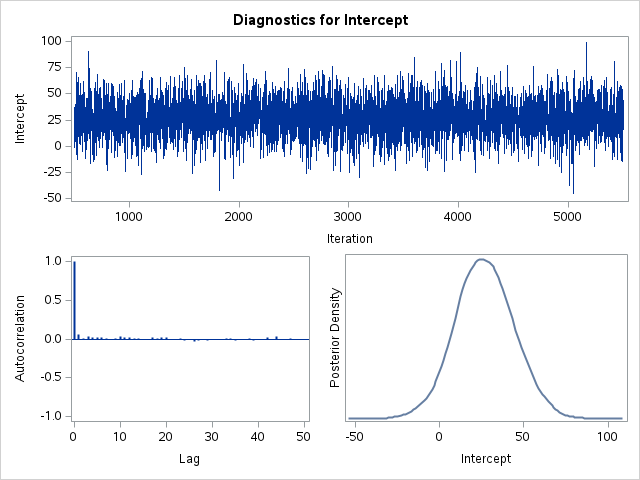
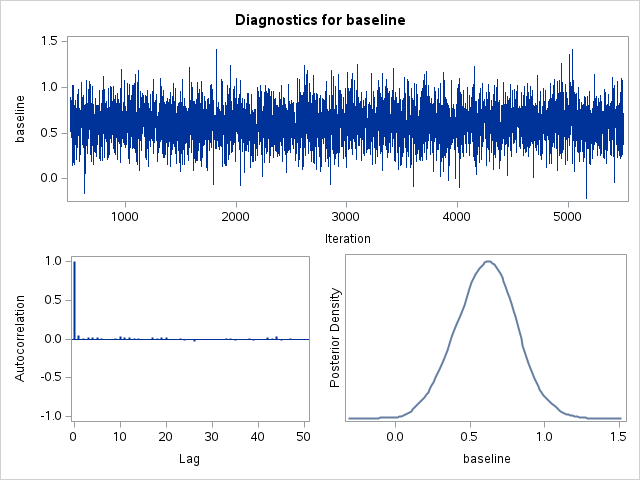
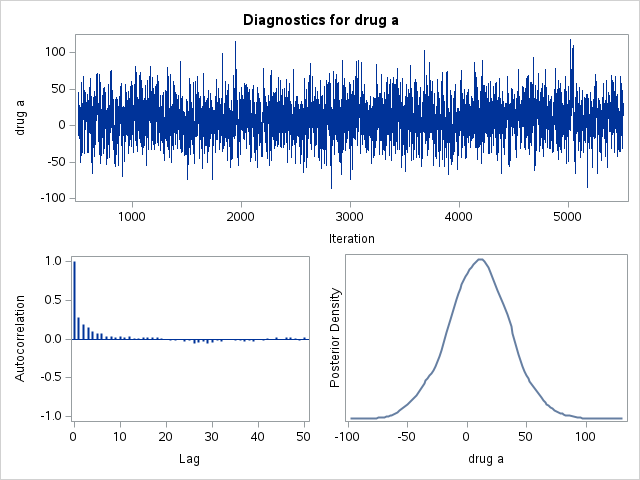
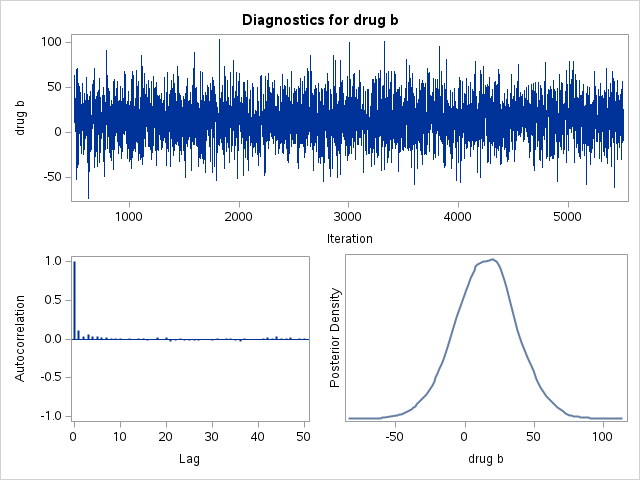
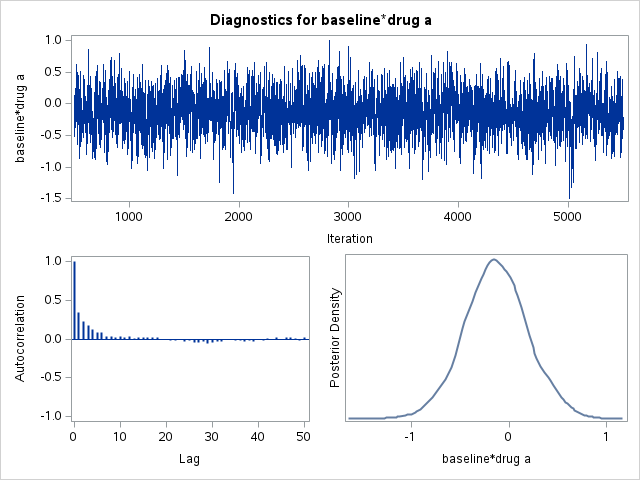
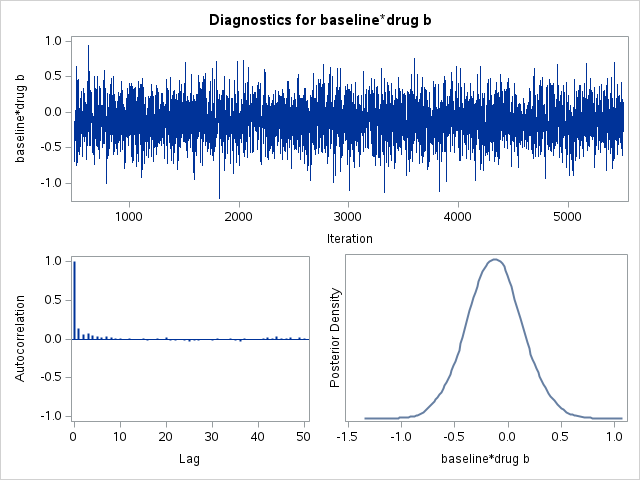
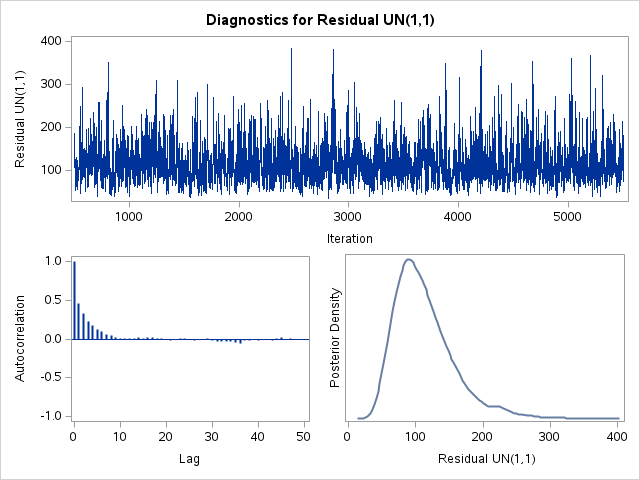
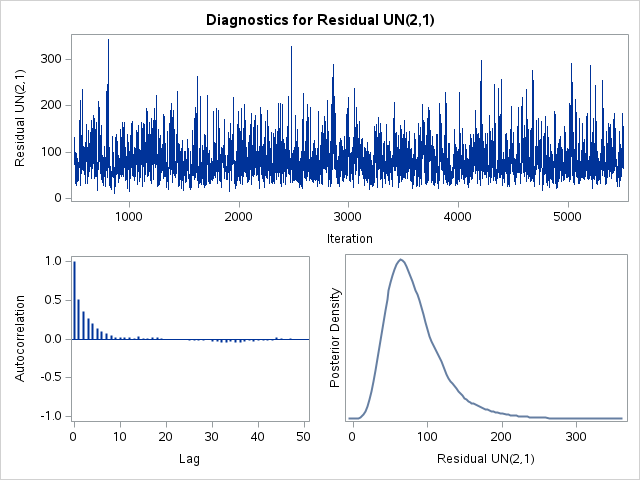
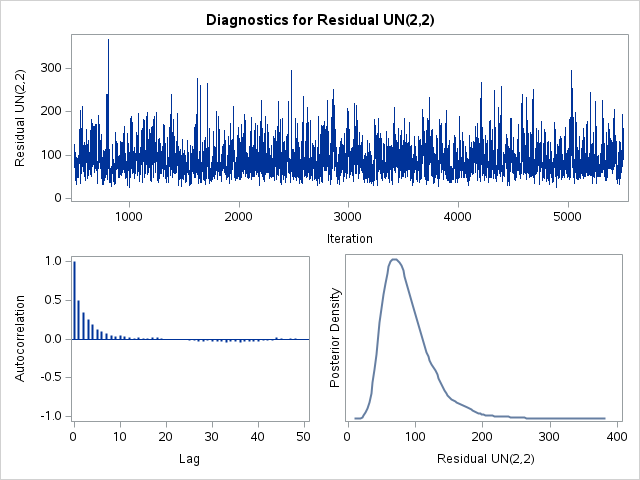
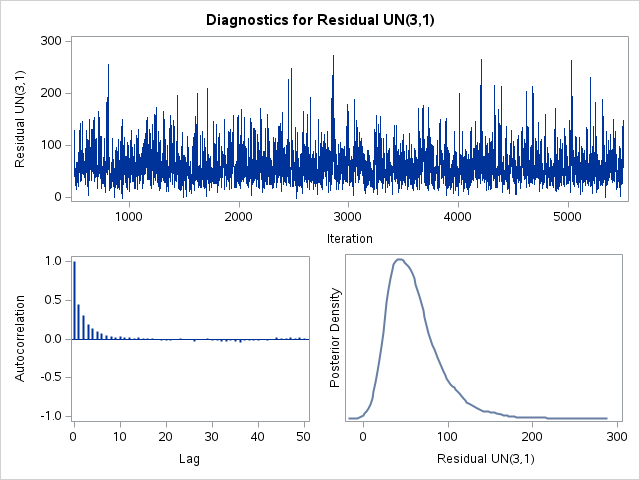
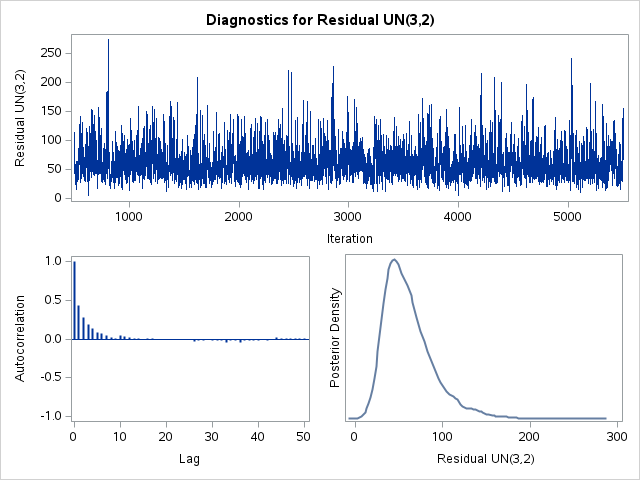
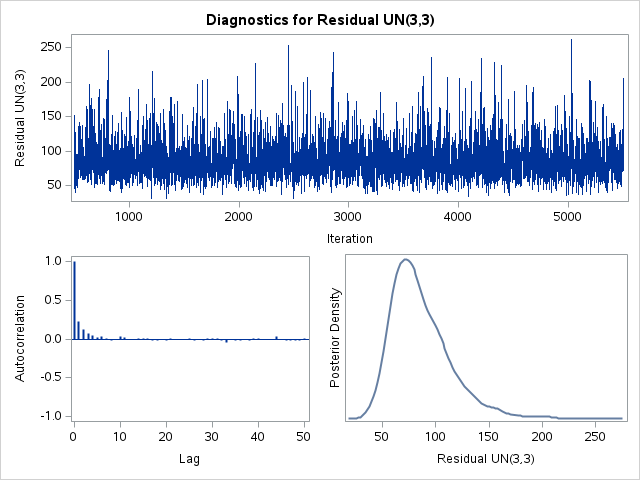
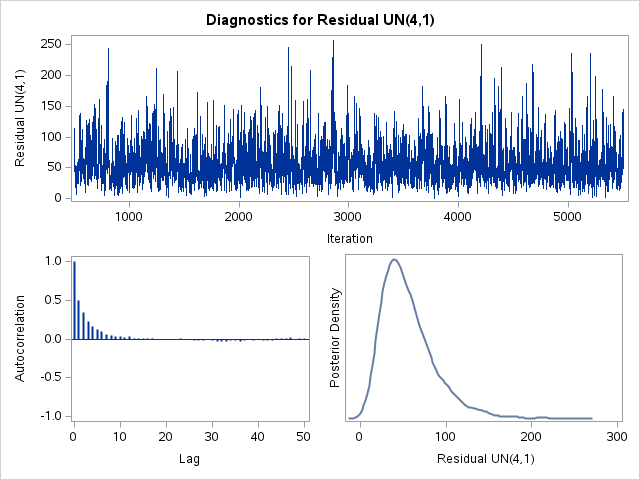
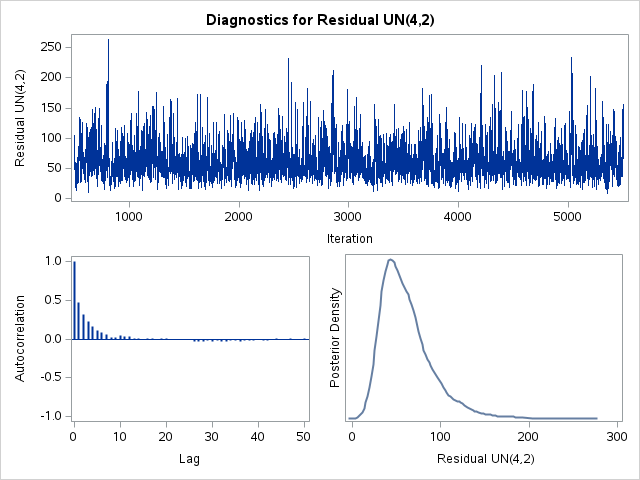
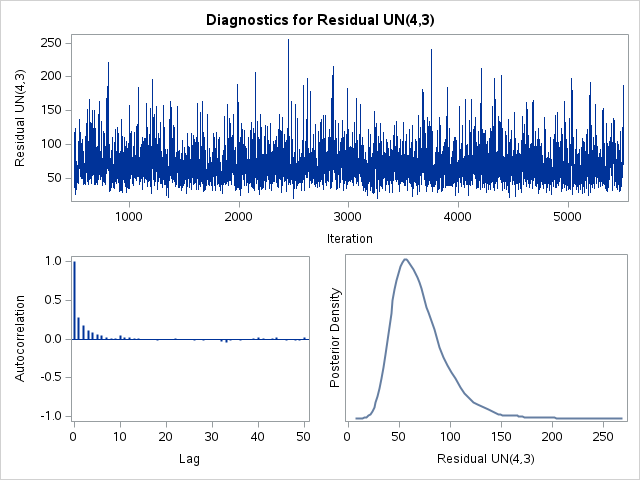
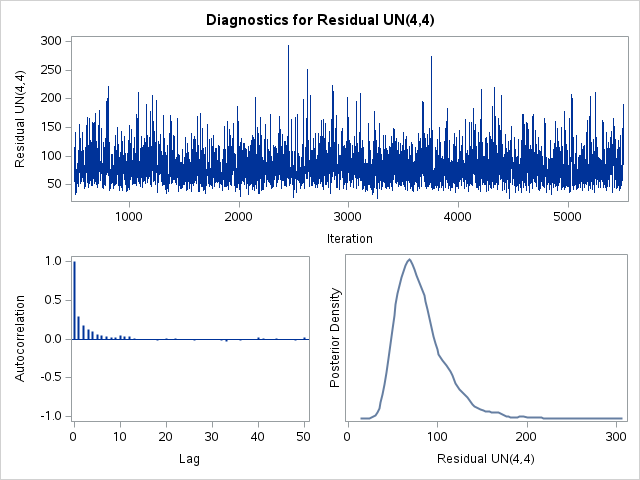
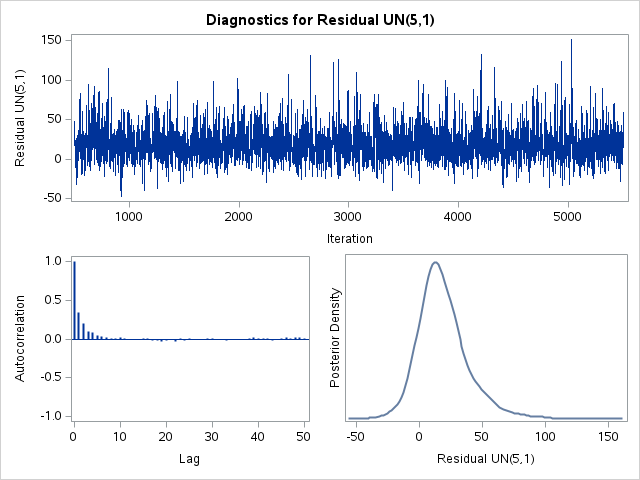
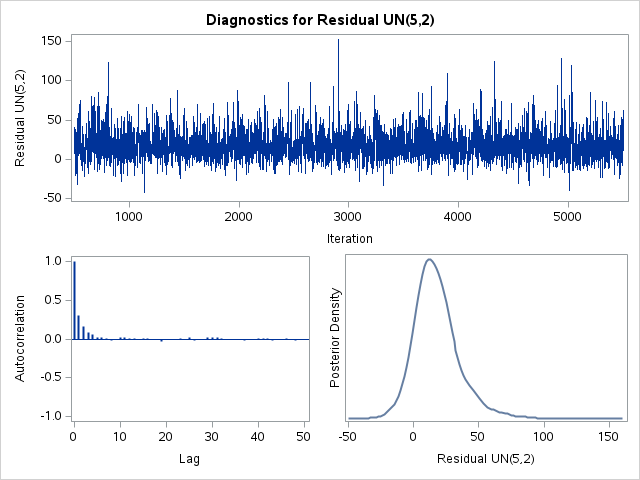
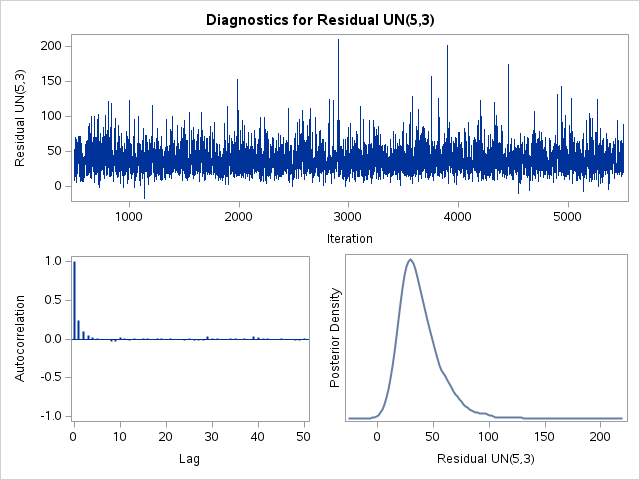
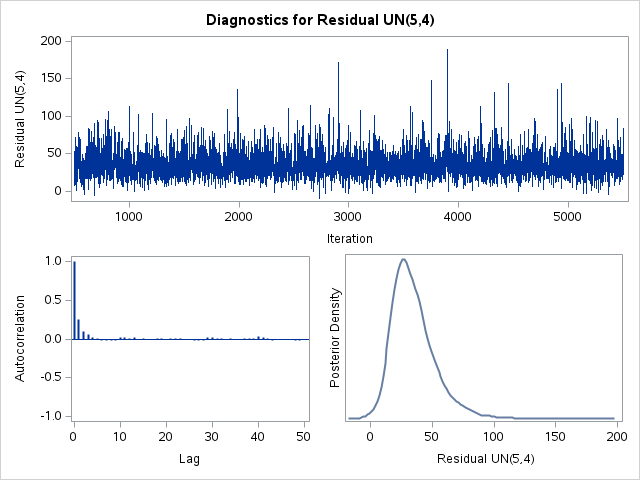
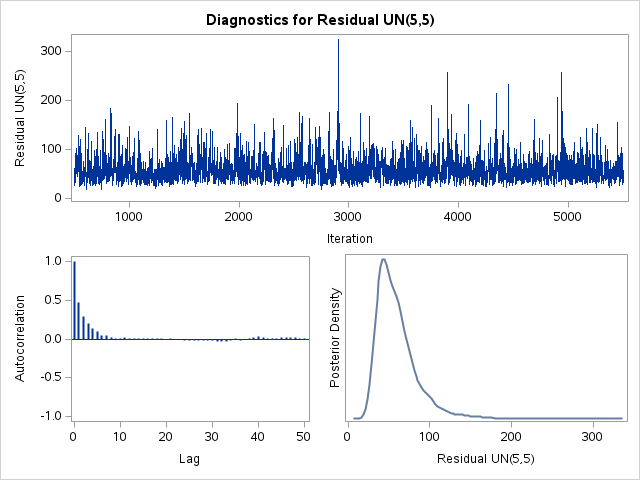

In [10]:
proc bglimm data=work.heartrate seed=8675309 diag=all plots=all;
   class drug hours patient;
   model heartrate = baseline drug drug*baseline / dist=normal;
   repeated hours/ type=un sub=patient;
run;

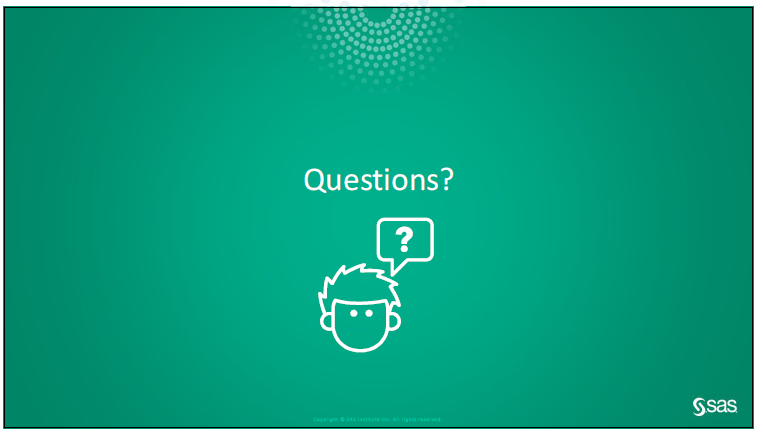